# Example of the Box-Cox power transformation

The Box-Cox power transformation is given by *lambda* parameter as:

* `y = (x**lambda - 1) / lambda,  for lambda != 0`
* `y = log(x),                    for lambda == 0`

There is the *boxcox* function in the *scipy* package, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html.

We introduce an example of this transformation applied on a sample from the exponential distribution with various *lambda*s.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

c_lambdas = [1.5, 1, 0.5, 0.25, 0, -0.5] # various lambdas

D = pd.DataFrame({'x': stats.expon.rvs(loc=0, scale=1, size=5000)}) # data frame, x = sample from the exponential distribution

In [2]:
# note that numerator is decreased by 1 after powering
D["x0"] = stats.boxcox(D["x"], c_lambdas[0]) # powered to 1.5
D["x1"] = stats.boxcox(D["x"], c_lambdas[1]) # identity
D["x2"] = stats.boxcox(D["x"], c_lambdas[2]) # sqrt
D["x3"] = stats.boxcox(D["x"], c_lambdas[3]) # 4th root
D["x4"] = stats.boxcox(D["x"], c_lambdas[4]) # logarithm
D["x5"] = stats.boxcox(D["x"], c_lambdas[5]) # reciprocal sqrt
D["xopt"], lopt = stats.boxcox(D["x"]) # let lambda optimized
print("Optimal lambda: ", lopt)

Optimal lambda:  0.27391805825323995


C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


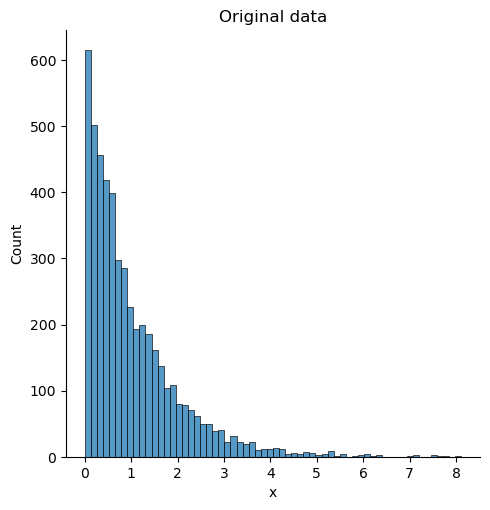

In [3]:
g = sns.displot(data=D, x="x", kind="hist").set(title="Original data")

C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


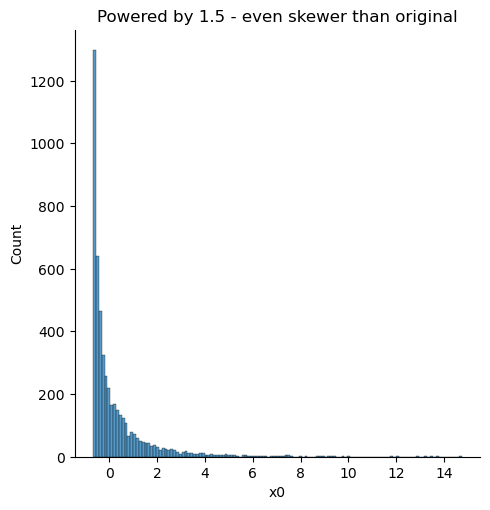

In [4]:
g = sns.displot(data=D, x="x0", kind="hist").set(title="Powered by 1.5 - even skewer than original")

C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


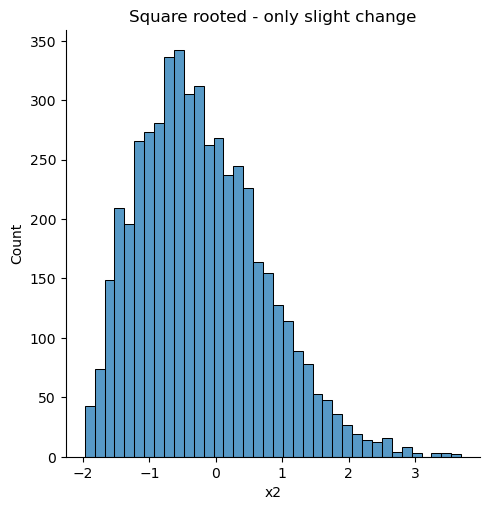

In [5]:
g = sns.displot(data=D, x="x2", kind="hist").set(title="Square rooted - a good step but still skewed")

C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


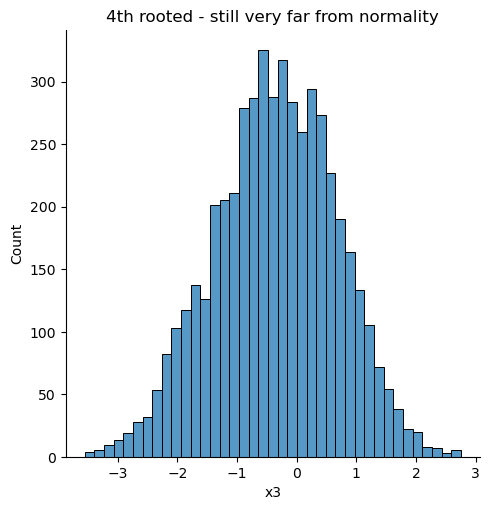

In [6]:
g = sns.displot(data=D, x="x3", kind="hist").set(title="4th rooted - looks very well")

C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


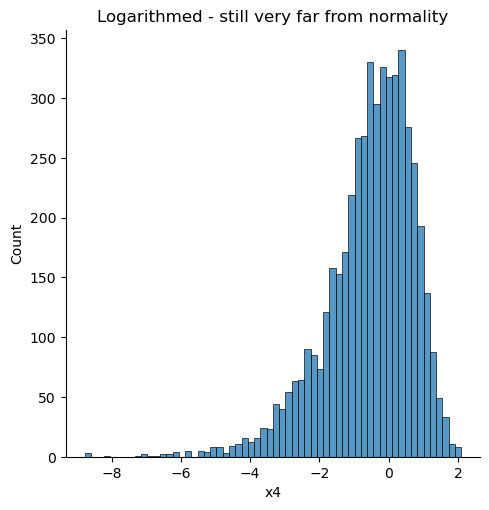

In [7]:
g = sns.displot(data=D, x="x4", kind="hist").set(title="Logarithmed - oops, skewed in opposite direction")

C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


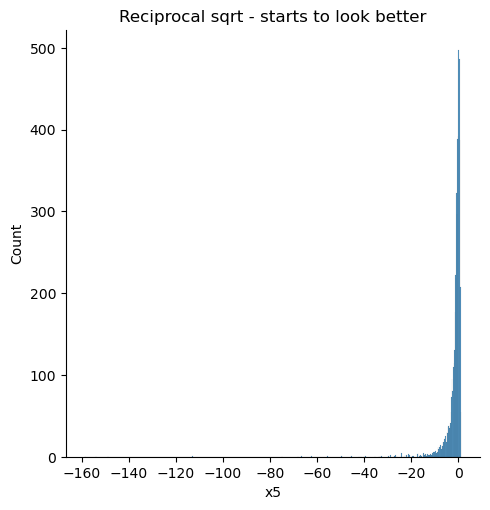

In [8]:
g = sns.displot(data=D, x="x5", kind="hist").set(title="Reciprocal sqrt - just for a complete view, very skewed")

C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jhucin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


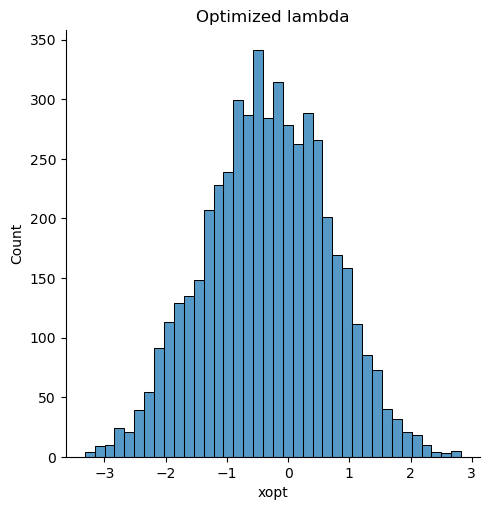

In [9]:
g = sns.displot(data=D, x="xopt", kind="hist").set(title="Optimized lambda")

# Normality test

There are many statistical test of normality. The visual one is *Q-Q (quantile-quantile plot)*, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html. As we see, the power transformation makes data more gaussian-like (though not perfect).

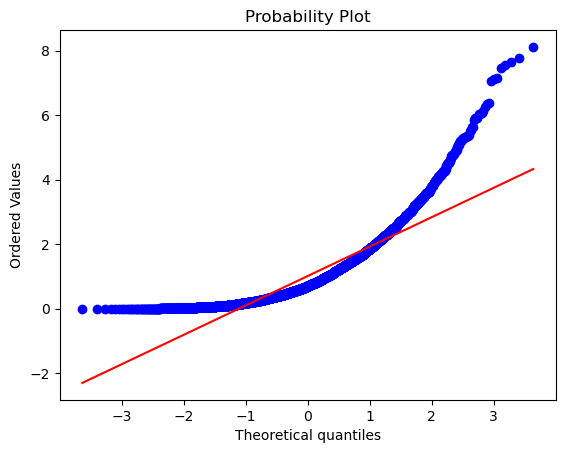

In [10]:
res = stats.probplot(D["x"], plot=plt) # original data

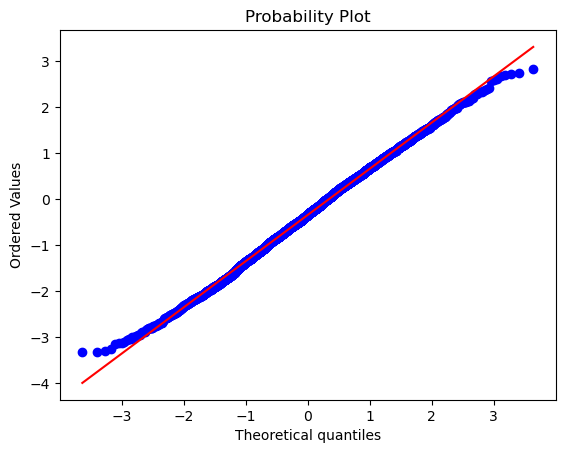

In [11]:
res = stats.probplot(D["xopt"], plot=plt) # optimized lambda

# Try yourself

Now try to apply a power transformation either on sample from different distribution, or on some real data (e. g. on win ratios above 1, i. e. cases of winnings bigger than bets, of the *hazard* dataset).